In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn import tree
from sklearn import metrics

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#loading
df = pd.read_csv('train_sample_final.csv', sep=';')
sorted_df = df.sort_values(by=['Класс'], ascending=True)
x = sorted_df.copy(deep=True)
y = sorted_df.copy(deep=True)
y = y['Класс']

def sampling(x_full, class_number):
    x_sample = x_full.copy(deep=True)
    for index in range(0,len(x_sample)):
        if (x_sample['Класс'][index] != class_number):
            x_sample.drop(index, inplace=True)
    return x_sample

x_normal = sampling(x, 0)
x_alert = sampling(x, 1)
x_pat = sampling(x, 2)

def data_prep(x_data):
    x_data = x_data.drop(columns=['Класс'])
    x_data = x_data.drop(columns=['Неделя_беременности'])
    for i in ['Температура_тела','Глюкоза','SG']:
        for j in range(len(x_data[i])):
            if (',' in x_data[i][j]):
                x_data[i][j] = x_data[i][j].replace(',','.')
        x_data = x_data.astype({i: float})
    return x_data
x_normal = data_prep(x_normal)

KeyError: 0

In [32]:
#normal values generation
new_data = []
n_samples = 10
for iter in range(n_samples):
    sample = []
    #боль внизу живота, тошнота, количество рвотных позвывов за день, признаки орви 
    for zero in range(4):
        sample.append(0)
    #температура тела, сатурация
    sample.append(random.randint(364,368)/10)
    sample.append(random.randint(97,99))
    #BLD, KET, LEU, GLU, NIT
    for zero in range(5):
        sample.append(0)
    #URO, BIL, VC
    for urobilvc_iter in range(3):
        urobilvc = random.randint(0,1)
        sample.append(urobilvc)
    #PRO
    sample.append(random.randint(0,2))
    #PH
    sample.append(random.randint(5,7))
    for feature in ['SG','Артериальное_давление_верхнее','Артериальное_давление_нижнее', 'Пульс', 'Глюкоза']:
        feat_mean = np.mean(x_normal[feature])
        feat_std = np.std(x_normal[feature])
        new_val = np.random.normal(feat_mean,feat_std,1)
        if (feature == 'SG'):
            rounded_val = np.round(new_val,3)
        if (feature == 'Артериальное_давление_верхнее' or feature == 'Артериальное_давление_нижнее' or feature == 'Пульс'):
            rounded_val = np.round(new_val,0)
        if (feature == 'Глюкоза'):
            rounded_val = np.round(new_val,1)
        sample.append(rounded_val[0])
    new_data.append(sample)
new_df = pd.DataFrame(new_data, columns=['Боль_внизу_живота','Тошнота','Количество_рвотных позывов_за_день', 'Признаки_ОРВИ','Температура_тела', 'Сатурация','BLD','KET','LEU','GLU','NIT','URO','BIL','VC','PRO','PH','SG','Артериальное_давление_верхнее','Артериальное_давление_нижнее', 'Пульс', 'Глюкоза'])
print(new_df)

TypeError: Could not convert string '1,031,031,031,031,031,031,031,031,031,031,031,031,031,031,03' to numeric

In [19]:
#patological values generation
new_data = []
n_samples = 10
for iter in range(n_samples):
    sample = []
    #боль внизу живота, тошнота, количество рвотных позвывов за день, признаки орви 
    for anamnez in range(2):
        sample.append(random.choices([0, 1],[4, 1])[0])
    if (sample[1] == 1):
        sample.append(random.randint(5,13))
    else: 
        sample.append(0)
    sample.append(random.randint(0,1))
    #температура тела, сатурация
    sample.append(36.6)
    sample.append(99)
    #BLD, KET, LEU, GLU, NIT
    for zero in range(5):
        sample.append(0)
    #URO, BIL, VC
    for urobilvc_iter in range(3):
        urobilvc = random.randint(0,1)
        sample.append(urobilvc)
    #PRO
    sample.append(random.randint(0,2))
    #PH
    sample.append(random.randint(5,7))
    for feature in ['SG','Артериальное_давление_верхнее','Артериальное_давление_нижнее', 'Пульс', 'Глюкоза']:
        feat_mean = np.mean(x[feature])
        feat_std = np.std(x[feature])
        new_val = np.random.normal(feat_mean,feat_std,1)
        if (feature == 'SG'):
            rounded_val = np.round(new_val,3)
        if (feature == 'Артериальное_давление_верхнее' or feature == 'Артериальное_давление_нижнее' or feature == 'Пульс'):
            rounded_val = np.round(new_val,0)
        if (feature == 'Глюкоза'):
            rounded_val = np.round(new_val,1)
        sample.append(rounded_val[0])
    new_data.append(sample)
new_df = pd.DataFrame(new_data, columns=['Боль_внизу_живота','Тошнота','Количество_рвотных позывов_за_день', 'Признаки_ОРВИ','Температура_тела', 'Сатурация','BLD','KET','LEU','GLU','NIT','URO','BIL','VC','PRO','PH','SG','Артериальное_давление_верхнее','Артериальное_давление_нижнее', 'Пульс', 'Глюкоза'])
print(new_df)

   Боль_внизу_живота  Тошнота  Количество_рвотных позывов_за_день  \
0                  0        1                                  12   
1                  0        0                                   0   
2                  1        0                                   0   
3                  0        0                                   0   
4                  0        0                                   0   
5                  0        1                                   9   
6                  0        1                                  10   
7                  0        0                                   0   
8                  0        0                                   0   
9                  0        0                                   0   

   Признаки_ОРВИ  Температура_тела  Сатурация  BLD  KET  LEU  GLU  ...  URO  \
0              0              36.6         99    0    0    0    0  ...    1   
1              0              36.6         99    0    0    0    0  ...    0   
2  

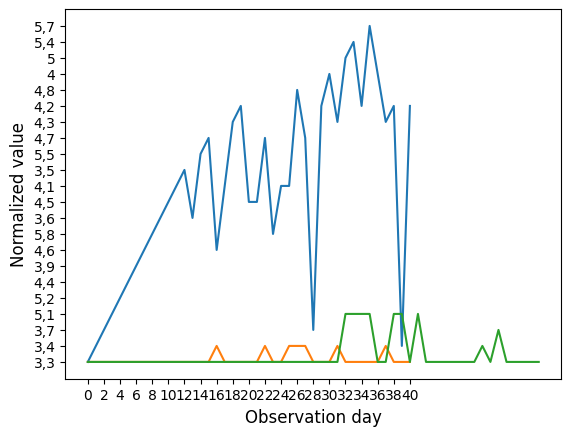

In [15]:
#visualization
xpoints = []
for ipx in range(0,len(x['URO'][0:41])):
    if (ipx%2 == 0):
        xpoints.append(ipx)

plt.figure()
plt.plot(range(0,len(x['Глюкоза'][0:41])), x['Глюкоза'][0:41], label='Нижнее')
plt.plot(range(0,len(x['KET'][0:41])), x['KET'][0:41], label= "Верхнее")
plt.plot(range(0,len(x['GLU'])), x['GLU'], label= 'GLU')
plt.xlabel("Observation day", fontsize=12, labelpad=None, loc=None)
plt.xticks(xpoints)
plt.ylabel("Normalized value", fontsize=12, labelpad=None, loc=None)
#plt.legend()
plt.show()

[0]


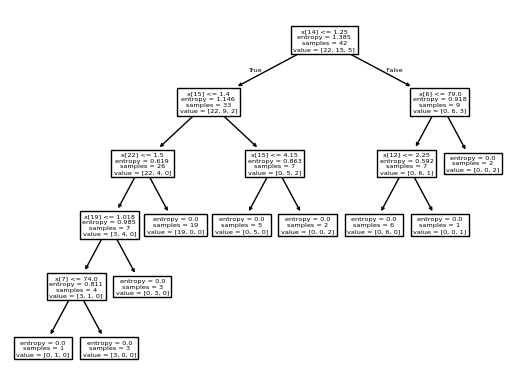

In [ ]:
#training
model=tree.DecisionTreeClassifier(criterion="entropy")
model.fit(x,y)
tree.plot_tree(model)

print(model.predict(x.iloc[[1]]))

In [5]:
x_test = pd.read_csv('pregnant1.csv', sep=';')
sorted_x_test = x_test.sort_values(by=['Класс'], ascending=True)
x1 = sorted_x_test.copy(deep=True)
x1 = x1.drop(columns=['Класс'])
x1 = x1.drop(columns=['Неделя_беременности'])
y1 = sorted_x_test.copy(deep=True)
y1 = y1['Класс']
for i in ['Глюкоза','URO','BLD','BIL','KET','LEU','PRO','NIT','SG','VC']:
    for j in range(len(x1[i])):
        if (',' in x1[i][j]):
            x1[i][j] = x1[i][j].replace(',','.')
    x1 = x1.astype({i: float})

print(model.predict(x1.iloc[[0]]))

[1]


In [6]:
y_pred = []
for k in range(len(x)):
    pred = int(model.predict(x.iloc[[k]]))
    y_pred.append(pred)
print(model.predict(x.iloc[[3]]))
metrics.classification_report(y, y_pred)
metrics.confusion_matrix(y, y_pred)

[0]


array([[22,  0,  0],
       [ 0, 15,  0],
       [ 0,  0,  5]])